# ML with Least Square GD

In this notebook, we will use the functions in the file least_squares_GD.py. 

In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
from IPython import display
# Import everything in the functions folder
from functions.costs import *
from functions.proj1_helpers import *
from functions.split import *
from functions.least_squares_GD import *

First, we load the data

In [2]:
DATA_TRAIN_PATH = 'data/train.csv' 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

We split the data, just to see if we can predict something

In [3]:
ratio = 0.8
x_train, y_train, x_test, y_test = split_data(tX, y, ratio)
nbr_param = len(x_train[0])

We plot the graph Loss vs Epochs while doing the Gradient Descent

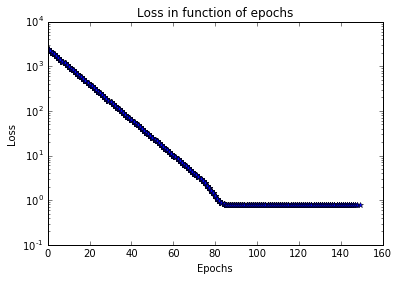

In [5]:
# Define the parameters of the algorithm.
max_iters = 150
gamma = 0.2
loss_type = "MAE"

# Initialization
w_initial = np.random.rand(nbr_param)

gradient_losses, gradient_ws = gradient_descent(y_train, x_train, 
                                w_initial, max_iters, gamma, loss_type)

We just take w_star as the last w

In [6]:
w_star = gradient_ws[-1]

Compute the prediction

In [16]:
pred = np.dot(x_train, w_star)

pred_bin = []

for i in pred:
    if i > 0:
        pred_bin.append(1)
    else:
        pred_bin.append(-1)
        
wrong = 0
right = 0
for i in range(len(y_train)):
    if y_train[i] == pred_bin[i]:
        right = right + 1
    else:
        wrong = wrong + 1
        
print("Wrong prediction: %i (%f%%)\nGood prediction: %i (%f%%)"%
      (wrong, 100*wrong/len(y_train), right, 100*right/len(y_train)))    

Wrong prediction: 73146 (36.573000%)
Good prediction: 126854 (63.427000%)
